# 计算物理作业5 # 
## 16350028 黄俊康 ##

## 作业5-1   核衰变 ##
本题中我们假设t = 0时刻,A核有100个, B核有0个. 原子核个数变化的微分方程为:<br><br>
$$\frac{{\rm d}N_B}{{\rm d}t} = -\frac{N_A}{\tau_A} \tag{1}$$<br>
$$ \frac{{\rm d}N_A}{{\rm d}t} = \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B} \tag{2}$$ <br>
<br>由第一式容易解得:<br><br>
$$ N_A = 100{\rm e}^{-\frac{t}{\tau_A}} $$<br>
<br>对于第二式,我们可以猜测$N_B$可以表示为:<br><br>
$$N_B = C_A{\rm e}^{-\frac{t}{\tau_A}}+C_B{\rm e}^{\frac{t}{\tau_B}}$$<br>
<br>则$N_B$的微分为:<br><br>
$$ \frac{{\rm d}N_B}{{\rm d}t} = - \frac{C_A}{\tau_A}{\rm e}^{-\frac{t}{\tau_A}} - \frac{C_B}{\tau_B}{\rm e}^{-\frac{t}{\tau_B}} $$<br>
$$= (-\frac{C_A}{\tau_A}+\frac{C_A}{\tau_B}){\rm e}^{-\frac{t}{\tau_A}} - \frac{1}{\tau_B}(C_A{\rm e}^{-\frac{t}{\tau_A}} + C_B{\rm e}^{-\frac{t}{\tau_B}})$$<br>
$$=C_A(-\frac{1}{\tau_A}+\frac{1}{\tau_B}){\rm e}^{-\frac{t}{\tau_A}} - \frac{N_B}{\tau_B}\tag{3}$$ <br>
另一方面,对于(2)式的右边代入$N_A$的表达式得到:<br><br>
$$\frac{{\rm d}N_A}{{\rm d}t} = \frac{100}{\tau_A}{\rm e}^{-\frac{t}{\tau_A}} - \frac{N_B}{\tau_B} \tag{4}$$<br>
将(3)和(4)相对比解得:<br><br>
$$C_A = \frac{100}{\frac{\tau_A}{\tau_B} - 1}$$<br>
但是$N_B$还有一个待定系数$C_B$,这个系数可以由初始条件:$N_B(t = 0) = 0$得到:<br><br>
$$C_A + C_B = 0$$<br>
即$$C_B = \frac{100}{1 - \frac{\tau_A}{\tau_B}}$$<br>
所以我们得到$N_A$和$N_B$的变化为:($\tau_A \ne \tau_B$)<br><br>
$$ N_A = 100{\rm e}^{-\frac{t}{\tau_A}} \tag{5}$$<br>
$$ N_B = \frac{100}{\frac{\tau_A}{\tau_B} - 1}({\rm e}^{-\frac{t}{\tau_A}} - {\rm e}^{-\frac{t}{\tau_B}}) \tag{6}$$<br>
然而,上面的情况都只是时间常数不相等的情况,当时间常数相等时,公式(6)的分母为0,显然不合理.<br>
对于$\tau_A = \tau_B$的情况,我们得另外猜测$N_B$的变化函数. 通过将公式(6)取$\tau_A = \tau_B$的极限我们也容易得到,此时$N_B$的变化为下面的形式:<br><br>
$$N_B = \lim_{\frac{\tau_A}{\tau_B} \to 1} \frac{100}{\frac{\tau_A}{\tau_B} - 1} {\rm e}^{-\frac{t}{\tau_A}}(1 - {\rm e}^{t(\frac{1}{\tau_A} - \frac{1}{\tau_B})})$$<br>
$$N_B = \lim_{\frac{\tau_A}{\tau_B} \to 1} \frac{100}{\frac{\tau_A}{\tau_B} - 1} {\rm e}^{-\frac{t}{\tau_A}}(1 - {\rm e}^{\frac{t}{\tau_A} (1 - \frac{\tau_A}{\tau_B})}) $$<br>
可以得到:$$N_B = \frac{100t}{\tau_A} {\rm e}^{-\frac{t}{\tau_A}}      (\tau_A = \tau_B) \tag{7}$$

下面利用欧拉积分法数值积分出A和B数目的变化:

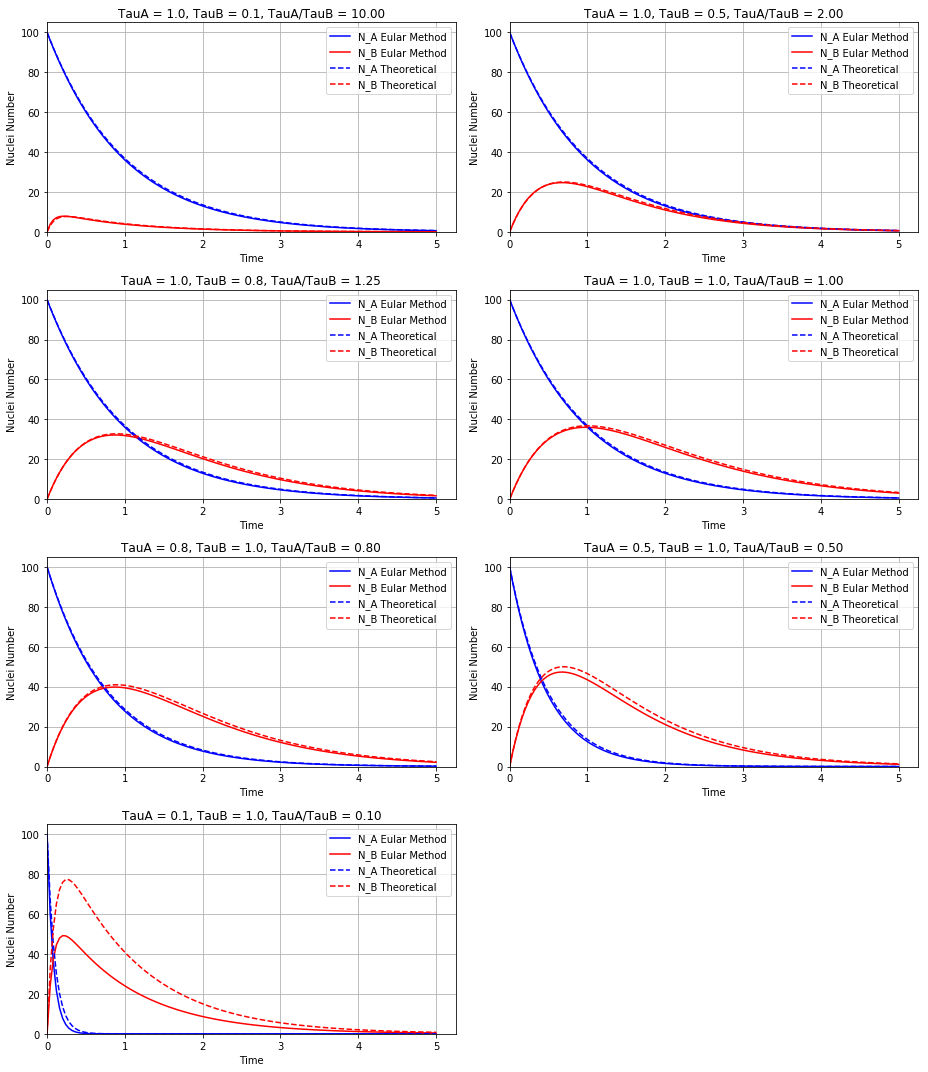

In [20]:
# 欧拉积分法解核衰变问题
import numpy as np
import matplotlib.pyplot as plt

# 选取上课时练习的参数,方便比较
tmax = 5    # tmax是最大的时间  
delta_t = 0.04    # delta_t为欧拉法取点的间隔,以及绘图时的取点间隔

# 由欧拉法得到nA和nB的时间变化
def Eular(tauA, tauB):
    ts = [0]  # ts 为时间点的列表
    t = 0  # t为当前时间
    nAs = [100]  # nAs为nA变化的列表
    nA = 100  # nA为当前的nA,即当前A原子核的数目
    nBs = [0]  # nBs为nB变化的列表
    nB = 0  # nB为当前的nB,即当前的B原子核数目
    
    # 在时间0到tmax的范围内进行变化
    while t <= tmax:
        # nA的增量由当前的nA本身决定
        nA += - nA / tauA * delta_t
        # nB的增量由nA和nB当前的值决定
        nB += (nA / tauA - nB / tauB)*delta_t
        # 在核数目列表中更新变化点
        nAs.append(nA)
        nBs.append(nB)
        # 时间相应增加
        t += delta_t
        # 更新时间点
        ts.append(t)
    # 把时间和变化打包为一个tuple返回
    return (ts, nAs, nBs)

# 理论上A和B的变化公式:
# 计算出t时刻的A和B原子核的数目
def theoretical(tauA, tauB, t):
    # 分为tauA不等于tauB和等于两类
    if tauA != tauB:
        # 直接利用前面推导得到的公式(6)返回理论结果,将A和B的数目打包为一个tuple返回
        return (100*np.exp(-t/tauA), 100/(tauA/tauB - 1)*(np.exp(-t/tauA) - np.exp(-t/tauB)))
    else:
        # 若两个时间常数相等,则引用公式(7)
        return (100*np.exp(-t/tauA), 100 * t / tauA * np.exp(-t / tauA))
# 取时间常数为下面的组合,分别进行绘图
tau = [(1, 0.1), (1, 0.5), (1, 0.8),(1, 1), (0.8, 1), (0.5, 1), (0.1, 1)]
# 创建fig,设定合适的figsize
fig = plt.figure(figsize=(13, 15))
# cols为子图排布的列数, rows为行数
cols = 2; rows = 4

# 对于每一对时间常数,进行绘图
for i in range(len(tau)):
    # 创建对应位置的子图
    plt.subplot(rows, cols, i + 1)
    # 先用欧拉法得到时间点和欧拉法预测点
    ts, nAs, nBs = Eular(tau[i][0], tau[i][1])
    # 绘制出欧拉法预测点的图线,并设置标签,颜色,线型
    plt.plot(ts, nAs, label='N_A Eular Method', color='blue', linestyle='-')
    plt.plot(ts, nBs, label='N_B Eular Method', color='red', linestyle='-')
    # 将前面得到的时间点列表转换为numpy数组, 求出理论上的原子核数目变化
    nAs_theo, nBs_theo = theoretical(tau[i][0], tau[i][1], np.array(ts))
    # 绘制出理论上的原子核数目变化,并设置标签,颜色,线型
    plt.plot(ts, nAs_theo, label='N_A Theoretical', color='blue', linestyle='--')
    plt.plot(ts, nBs_theo, label='N_B Theoretical', color='red', linestyle='--')
    plt.legend()    # 显示出图例标签
    # 显示坐标轴标签
    plt.xlabel('Time')
    plt.ylabel('Nuclei Number')
    # 为了便于观察,设置坐标轴都从0开始
    plt.xlim(0)
    plt.ylim(0)
    # 增添网格,便于观察
    plt.grid()
    # 每一幅图设置对应的标题,标题含有两个时间长书以及时间常数的比值.
    plt.title('TauA = %.1f, TauB = %.1f, TauA/TauB = %.2f'%(tau[i][0], tau[i][1], tau[i][0]/tau[i][1]))
# 紧密排列子图
plt.tight_layout()
# 展示图片
plt.show()

  1.由上面的图形可以观察到,随着时间常数比值$\frac{\tau_A}{\tau_B}$的减小, 过程中$N_B$产生的越来越多,这是因为B的衰减速度相对于A越来越慢,导致过程中会出现越来越多的B原子核的累积.<br><br>
  2.另一方面,随着时间常数比值$\frac{\tau_A}{\tau_B}$越来越小,利用欧拉法预测的变化误差越来越大,这是因为随着时间常数比值减小,在刚开始的时候原子核数目转换会较快,导致A和B原子核的数目变化较快,在较快的变化下,欧拉积分法预测的将愈发不准确,误差累计起来,到后面误差就很明显了.

## 作业 5-2 行星轨道计算 ##
利用RK4算法计算出太阳系水星, 金星, 地球的轨道<br>
只考虑平面上的运动, 取太阳系的一个天文单位为距离单位, 太阳质量为1, 时间单位为年yr

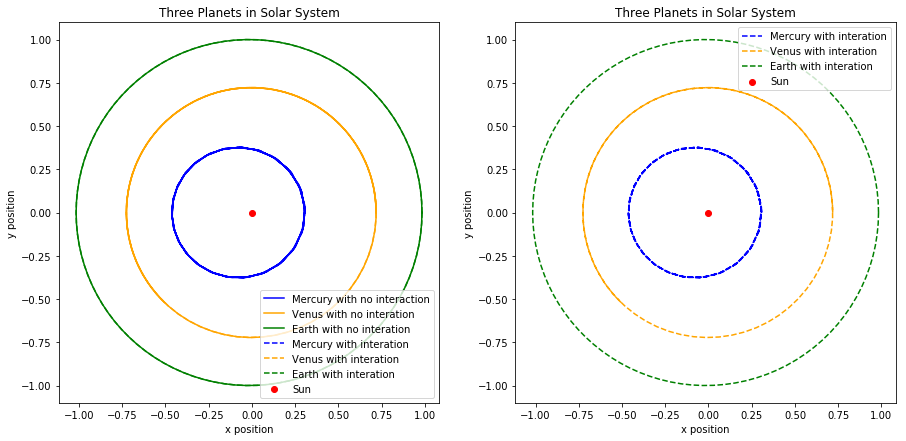

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# 约化万有引力常数
G = (2.*np.pi)**2
# 模拟的时间,之所以取1.01是为了让虚线尽可能的明显, 同时防止地球轨道出现缺口
tmax = 1.01
# 时间布长
dt = 0.01

# 首先编写RK4积分函数
# 输入的t为初始时间(自变量),x为初始变量,f为x的导数函数, dt为时间间隔
def rk4(t, x, f, dt):
    # 根据公式直接计算出4个变化量
    dx1 = f(t, x) * dt
    dx2 = f(t + dt/2, x + dx1/2) * dt
    dx3 = f(t + dt/2, x + dx2/2) * dt
    dx4 = f(t + dt, x + dx3) * dt
    # 将4个变化量施加特定权重,相加后返回最终的x变化量预测值
    return dx1 / 6. + dx2 / 3. + dx3 / 3. + dx4 / 6.

# sun_gravity函数输入当前的坐标速度状态向量state,返回每个元素对应的由太阳产生的变化率向量d/dt(state)
# 其中state为行星运动状态数组np.array([x, vx, y, vy])
def sun_gravity(t, state):
    # r为行星到太阳的距离
    r = np.sqrt(state[0]**2 + state[2]**2)
    # 返回state的变化率, 其中坐标的变化率为速度,速度变化率由万有引力公式求得
    return np.array([state[1], -G*state[0] / r**3, state[3], -G*state[2] / r**3])

# 创建一个函数,输入行星的半长轴a(A.U.)和离心率e和周期period(yr), 返回行星近日点处的离太阳的距离rm和速度vm
def initial(a, e, period):
    # 利用题目中提示的公式直接写出结果
    return (a*(1-e), 2*np.pi*a/period * np.sqrt((1+e)/(1-e)))

# 创建一个函数,该函数计算出输入的三个行星状态之间所有的相互影响的状态变化
# 也即,计算出每颗行星受到另外两颗行星的万有引力作用产生的额外的加速度
# 第三个mass参数是一个含有三个行星质量的list,这个质量是相对于太阳的
def corr(planet1, planet2, planet3, mass):
    # 将三颗行星的状态放到一个list之中便于循环处理
    state_list = [planet1, planet2, planet3]
    # 创建一个list用于记录每一颗行星的状态变化数组
    state_change = []
    # 研究第j颗行星对第i颗行星的影响
    for i in range(3):
        d_state = np.array([0.]*4)
        for j in range(3):
            # 不用考虑自身的影响
            if j != i:
                # x为两颗行星之间的x方向距离
                x = state_list[i][0] - state_list[j][0]
                # y为两颗行星之间的y方向的距离
                y = state_list[i][2] - state_list[j][2]
                # r为两颗行星之间的直线距离
                r = np.sqrt(x**2 + y**2)
                # 根据万有引力公式计算出第j颗行星对第i颗行星的状态变化量的额外贡献
                d_state += np.array([0., - G*mass[j]*x/r**3, 0., - G*mass[j]*y/r**3])
        # 此时的state_change为其他所有行星对第i颗行星的影响
        state_change.append(d_state)
    # 返回总的三颗行星受影响列表
    return state_change

# 对于考虑到相互作用的情况还需要定义新的gravity函数与前面的sun_gravity相对应
# total_state是将三个行星的state放到一起形成的一个数组
def gravity(t, total_state):
    
    # 三颗行星的质量列表,相比于太阳
    mass = [1.660e-07, 2.44784e-06, 2.99884e-06]
    # extra_impact是每颗行星受到其他行星的作用
    extra_impact = corr(total_state[0], total_state[1], total_state[2], mass)
    # impact是每颗行星受到的总的作用,需要加上太阳的主要作用
    impact = np.zeros_like(total_state)
    for i in range(3):
        # 太阳作用加上相互作用
        impact[i] += sun_gravity(t, total_state[i]) + extra_impact[i]
    return impact

# 创建水星,输入查到的水星的半长轴, 离心率和周期
rm, vm = initial(0.387, 0.205630, 0.241)
# 创建水星state数组
Mercury = np.array([rm, 0., 0., vm])
# 创建金星,输入查到的金星的半长轴, 离心率和周期
rm, vm = initial(0.72336, 0.006811, 0.6156)
# 创建金星的state数组
Venus = np.array([rm, 0., 0., vm])
# 创建地球,输入查到的地球的半长轴, 离心率和周期
rm, vm = initial(1.00, 0.0167, 1.00)
# 创建地球的state数组
Earth = np.array([rm, 0., 0., vm])

# 创建三个list用于储存行星坐标
m_position = [[],[]]  # 水星的x, y坐标列表
v_position = [[],[]]  # 金星的x, y坐标列表
e_position = [[],[]]  # 地球的x, y坐标列表

m_position_prime = [[],[]]  # 水星考虑到相互作用时的坐标列表
v_position_prime = [[],[]]  # 金星考虑到相互作用时的坐标列表
e_position_prime = [[],[]]  # 地球考虑到相互作用时的坐标列表

# 如果考虑到相互作用,将三颗行星的状态放在一起看作一个总的状态
total_state = np.array([Mercury, Venus, Earth])

# 计算三个行星的运行轨道
t = 0

# 在最大时间之内,反复进行循环
while t <= tmax:
    # 将每次循环的三颗行星的坐标加入坐标列表中
    m_position[0].append(Mercury[0]); m_position[1].append(Mercury[2])
    v_position[0].append(Venus[0]); v_position[1].append(Venus[2])
    e_position[0].append(Earth[0]); e_position[1].append(Earth[2])
    
    # 将每次循环的三颗行星的考虑到相互作用版本的坐标加入考虑到相互作用的坐标列表中
    m_position_prime[0].append(total_state[0][0]); m_position_prime[1].append(total_state[0][2])
    v_position_prime[0].append(total_state[1][0]); v_position_prime[1].append(total_state[1][2])
    e_position_prime[0].append(total_state[2][0]); e_position_prime[1].append(total_state[2][2])
    
    # 利用RK4算法更新三颗行星的坐标和速度
    Mercury += rk4(t, Mercury, sun_gravity, dt)
    Venus += rk4(t, Venus, sun_gravity, dt)
    Earth += rk4(t, Earth, sun_gravity, dt)
    
    # 对于考虑到相互作用的情况,应用对应版本的f函数,进行RK4积分
    total_state += rk4(t, total_state, gravity, dt)
    
    t += dt   # 更新时间

# 创建figure,设置大小
plt.figure(figsize=(15,7))
plt.subplot(121)
# 绘制出水星的运行轨迹
plt.plot(m_position[0], m_position[1], color='b', linestyle='-', label='Mercury with no interaction')
# 金星的运行轨迹
plt.plot(v_position[0], v_position[1], color='orange', linestyle='-', label='Venus with no interation')
# 地球的运行轨迹
plt.plot(e_position[0], e_position[1], color='g', linestyle='-', label='Earth with no interation')

# 绘制出考虑到相互作用时的坐标
plt.plot(m_position_prime[0], m_position_prime[1], color='b', linestyle='--', label='Mercury with interation')
plt.plot(v_position_prime[0], v_position_prime[1], color='orange', linestyle='--', label='Venus with interation')
plt.plot(e_position_prime[0], e_position_prime[1], color='g', linestyle='--', label='Earth with interation')
# 在原点处增加太阳的位置点
plt.scatter(0, 0, color='red', label='Sun')
plt.legend()  # 设置图例
# 设置两个坐标轴等比例
plt.axis('equal')
# 设置标题,坐标轴标签
plt.title('Three Planets in Solar System')
plt.xlabel('x position')
plt.ylabel('y position')
plt.subplot(122)
# 绘制出考虑到相互作用时的坐标
plt.plot(m_position_prime[0], m_position_prime[1], color='b', linestyle='--', label='Mercury with interation')
plt.plot(v_position_prime[0], v_position_prime[1], color='orange', linestyle='--', label='Venus with interation')
plt.plot(e_position_prime[0], e_position_prime[1], color='g', linestyle='--', label='Earth with interation')
# 在原点处增加太阳的位置点
plt.scatter(0, 0, color='red', label='Sun')
plt.legend()  # 设置图例
# 设置两个坐标轴等比例
plt.axis('equal')
# 设置标题,坐标轴标签
plt.title('Three Planets in Solar System')
plt.xlabel('x position')
plt.ylabel('y position')
# 展示图片
plt.show()

上面的图,实线部分为不考虑相互作用的结果,虚线为考虑相互作用的结果.<br>
第一幅图是将考虑和不考虑两种情况放到一起的结果,我们可以发现,虚线完全被实线覆盖,这说明行星之间作用对轨道的影响几乎可以忽略不计.<br>
第二幅图是单独将考虑相互作用的轨道拿出来的,是为了说明第一幅图中虚线是存在的,而不是没画出来